# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18603043,
   'total_supply': 18603043,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 35747.0,
     'volume_24h': 49751808184,
     'market_cap': 665937183394,
     'percentage_change_1h': -0.4031652898747,
     'percentage_change_24h': -3.4125372563442,
     'percentage_change_7d': -11.2904147818319,
     'percent_change_1h': -0.4031652898747,
     'percent_change_24h': -3.4125372563442,
     'percent_change_7d': -11.2904147818319},
    'CAD': {'price': 45552.4021,
     'volume_24h': 63398729168.8712,
     'market_cap': 848603752798.974,
     'percent_change_1h': -0.4031652898747,
     'percent_change_24h': -3.4125372563442,
     'percent_change_7d': -11.2904147818319}},
   'last_updated': 1610907210}},
 'metadata': {'timestamp': 1610907210,
  'num_cryptocurrencies': 1385,
  'error': None}}

In [6]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 114291700,
   'total_supply': 114291700,
   'max_supply': 0,
   'quotes': {'USD': {'price': 1229.89,
     'volume_24h': 35333148366,
     'market_cap': 140565836739,
     'percentage_change_1h': -0.689730618008713,
     'percentage_change_24h': -1.88909665549439,
     'percentage_change_7d': -4.13825122643794,
     'percent_change_1h': -0.689730618008713,
     'percent_change_24h': -1.88909665549439,
     'percent_change_7d': -4.13825122643794},
    'CAD': {'price': 1567.248827,
     'volume_24h': 45025030962.7938,
     'market_cap': 179123045756.508,
     'percent_change_1h': -0.689730618008713,
     'percent_change_24h': -1.88909665549439,
     'percent_change_7d': -4.13825122643794}},
   'last_updated': 1610907141}},
 'metadata': {'timestamp': 1610907141,
  'num_cryptocurrencies': 1385,
  'error': None}}

In [7]:
# Compute current value of my crpto
my_btc_value = btc_data['data']['1']['quotes']['USD']['price']
my_eth_value = eth_data['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $35747.00
The current value of your 5.3 ETH is $1229.89


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
api_key = os.getenv('ALPACA_API_KEY')
secret_key = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
alpaca = tradeapi.REST(api_key, secret_key, api_version = 'v2')

In [10]:
# Format current date as ISO format
Jan15 = pd.Timestamp('2021-01-15', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_tickers = alpaca.get_barset(
    tickers,
    timeframe,
    start = Jan15, 
    end = Jan15
).df

# Preview DataFrame
df_tickers

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-01-15 00:00:00-05:00  117.34  117.36  117.18  117.26  4776104  376.72   

                                                            
                             high    low   close    volume  
time                                                        
2021-01-15 00:00:00-05:00  377.58  373.7  375.68  78405054

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_tickers['AGG']['close'])
spy_close_price = float(df_tickers['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.26
Current SPY closing price: $375.68


In [12]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18784.00
The current value of your 200 AGG shares is $23452.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(
    {'amount' : 
     { 'crypto' : (my_btc_value + my_eth_value),
      'shares' : (my_agg_value + my_spy_value)}
    }
)

# Display savings DataFrame
display(df_savings)

,amount
crypto,36976.89
shares,42236.00


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

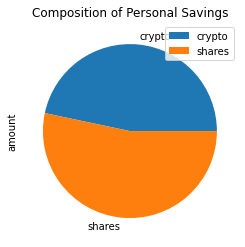

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title = "Composition of Personal Savings")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.loc['crypto']+df_savings.loc['shares']


# Validate saving health

if int(total_savings) >= int(emergency_fund):
    print(f"Congratulations! You have enough money in your emergency fund.")
elif int(total_savings) == int(emergency_fund):
    print(f"Congratulations! You reached your financial goal.")
else:
    print(f"To reach your goal, you need to $ {int(total_savings-emergency_fund)}")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
timeframe = '1D'
df_stock_data = alpaca.get_barset(
    tickers, 
    timeframe, 
    start = start_date, 
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_60_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4 , 0.6],
    num_simulation = 500, 
    num_trading_days = 252*30,
)

In [19]:
# Printing the simulation input data
MC_40_60_dist.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_60_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997169,1.009350,1.001940,1.002240,1.006818,0.999411,1.019277,0.999199,0.999065,1.003034,...,0.999106,1.000931,0.996099,0.993292,0.996465,1.003862,0.985582,0.997494,0.989963,1.003691
2,0.996740,1.019077,0.999177,0.994273,1.016053,0.996571,1.023820,0.998443,0.991861,1.017667,...,0.993640,1.003225,1.011293,0.990713,0.994892,1.002882,0.990772,0.995922,0.998671,1.016562
3,0.988979,1.020979,1.012155,1.003474,1.007520,0.981185,1.044571,0.984677,0.987992,1.018730,...,0.992254,1.001411,1.020354,0.990840,0.995895,1.017195,0.988163,1.003356,1.000982,1.005897
4,1.001040,1.013491,1.028378,1.006835,1.021163,0.976892,1.035326,0.986517,0.991772,1.010348,...,0.991238,1.004701,1.020594,0.987316,0.987200,1.017383,0.992225,1.001756,0.991699,0.993997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,34.079799,6.405727,3.955264,30.227408,3.551053,11.762525,12.590019,7.986794,5.105987,5.910065,...,10.169489,11.180919,9.928062,5.526718,4.944419,10.436454,27.920597,4.284667,2.795386,4.930867
7557,33.896242,6.360549,3.928684,30.282165,3.571032,11.725703,12.619598,7.959895,5.098982,5.869589,...,10.136870,11.142439,9.974703,5.543829,4.962790,10.481502,27.974943,4.295419,2.773990,4.901715
7558,33.815161,6.408005,3.976530,30.337130,3.593011,11.725948,12.561338,7.994815,5.102634,5.942841,...,10.136596,11.058210,10.021340,5.575937,4.939426,10.507744,27.863793,4.272511,2.756141,4.902912
7559,33.795591,6.441477,3.980675,30.242971,3.568173,11.750954,12.609227,8.015867,5.103042,5.984385,...,10.141820,11.115362,9.885083,5.560667,4.970393,10.610056,27.560041,4.239389,2.761974,4.880830


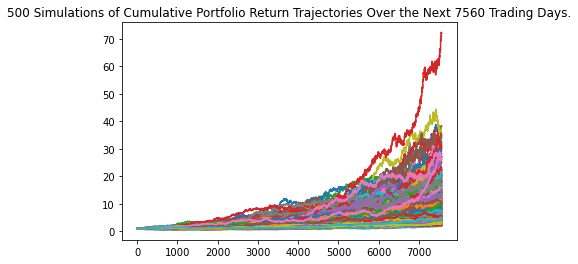

In [21]:
# Plot simulation outcomes
line_plot = MC_40_60_dist.plot_simulation()

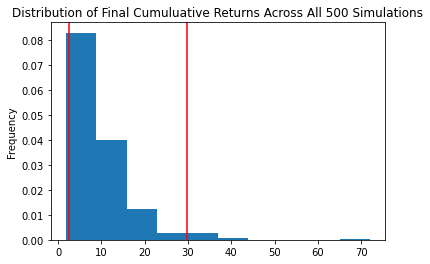

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_40_60_dist.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_summary = MC_40_60_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl_summary)

count           500.000000
mean              9.656871
std               7.089100
min               1.773629
25%               5.110947
50%               7.666447
75%              11.927104
max              72.050927
95% CI Lower      2.452102
95% CI Upper     29.751852
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round((tbl_summary[8]*initial_investment),2)
ci_upper = round((tbl_summary[9]*initial_investment),2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $49042.04 and $595037.04


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round((tbl_summary[8]*initial_investment),2)
ci_upper = round((tbl_summary[9]*initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $73563.06 and $892555.56


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_25_75_dist = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [0.25, 0.75], 
    num_simulation = 500, 
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_25_75_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000145,1.006154,1.002487,0.993844,0.992624,0.995789,0.992498,1.005230,0.994150,1.012776,...,0.998388,1.013506,1.005469,0.998781,1.006934,0.991117,0.992818,0.989459,1.007504,0.997055
2,1.005039,1.012010,1.001218,0.975433,0.988767,1.009853,0.996093,1.002425,0.990741,1.004224,...,1.003429,1.015312,1.000605,0.990647,1.015765,0.999388,0.987492,0.984785,0.993609,1.005020
3,1.005137,0.995451,0.995997,0.981832,0.980770,1.024204,0.972039,1.002198,0.999521,0.997569,...,1.008704,1.026911,0.991113,0.987052,1.019746,1.009922,0.998424,0.975000,1.003326,1.008248
4,0.999645,1.011887,0.995791,0.977957,0.977972,1.014901,0.971570,0.991362,0.988349,0.988709,...,1.011428,1.017758,0.994648,0.989682,1.026740,1.004101,1.001832,0.978886,0.989632,1.009957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.536923,2.102881,1.028912,0.831213,2.522631,0.995661,1.751290,1.721968,1.949893,1.083992,...,2.808668,1.274298,1.263103,1.099289,1.452737,1.485954,1.340655,1.341603,2.369429,1.324855
1257,2.563728,2.124579,1.032963,0.820005,2.513123,0.997290,1.759024,1.743927,1.970671,1.073756,...,2.753917,1.265322,1.255344,1.099171,1.463665,1.484266,1.333157,1.355745,2.399276,1.334855
1258,2.549117,2.087204,1.053071,0.812639,2.521482,0.992373,1.761640,1.736596,1.964449,1.061344,...,2.751019,1.250955,1.247124,1.084679,1.471781,1.476301,1.366970,1.350442,2.389677,1.354667
1259,2.505801,2.056409,1.058344,0.814770,2.534046,0.987065,1.776546,1.723636,1.960572,1.067011,...,2.784133,1.255519,1.238994,1.084217,1.484409,1.485001,1.379627,1.370591,2.399135,1.360285


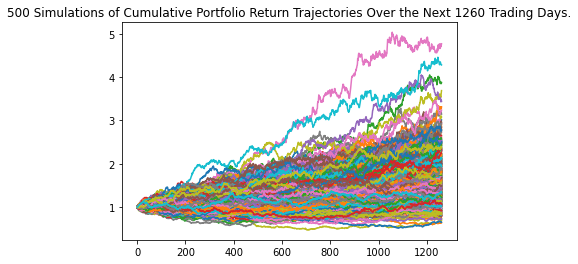

In [28]:
# Plot simulation outcomes
line_plot_five = MC_25_75_dist.plot_simulation()

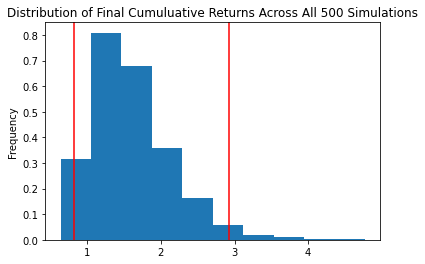

In [29]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_25_75_dist.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_25_75_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.607384
std               0.554273
min               0.638958
25%               1.234021
50%               1.508933
75%               1.884688
max               4.768974
95% CI Lower      0.816271
95% CI Upper      2.918490
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round((tbl_five[8]*initial_investment), 2)
ci_upper_five = round((tbl_five[9]*initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 5 years will end within in the range of $32650.84 and $116739.61


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_25_75_dist_ten = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [0.25, 0.75], 
    num_simulation = 500, 
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_25_75_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002944,1.014660,1.024899,0.996451,0.989997,1.017007,0.986298,1.000571,1.004898,0.993945,...,1.010114,1.001630,1.003488,1.001997,0.993546,1.010905,0.992170,1.001201,1.004563,1.012726
2,0.991840,1.022337,1.032611,0.978849,0.991202,1.012923,0.986253,0.996295,0.987965,0.987959,...,1.014813,0.991195,0.990075,0.986003,0.997138,1.007284,0.989054,0.998123,1.018511,1.013293
3,0.991786,1.018189,1.040033,0.993274,0.996170,1.017985,0.978459,0.998838,0.976244,1.001440,...,1.008802,0.983976,0.986738,0.976597,0.998411,0.997470,0.982066,0.985316,1.014880,1.019707
4,1.007451,1.026508,1.050689,0.992992,0.987848,1.024291,0.977326,0.992645,0.978582,0.991868,...,1.013949,0.978574,0.997460,0.983583,1.002056,0.987354,0.995582,0.984631,1.025009,1.021786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.574417,2.195032,1.553469,2.913091,0.842093,0.630912,1.105496,3.186191,3.147881,0.904633,...,3.611946,4.861174,1.540140,1.662806,3.928962,3.773715,5.236384,3.862490,2.601450,1.812106
2517,1.587519,2.206844,1.515050,2.910615,0.845279,0.637312,1.093606,3.207833,3.184926,0.895698,...,3.570067,4.881746,1.558267,1.680233,3.954882,3.818693,5.195977,3.901514,2.581044,1.816368
2518,1.590281,2.188910,1.547269,2.899795,0.849491,0.636218,1.091021,3.228446,3.196730,0.911346,...,3.594906,4.871162,1.558746,1.673041,3.993188,3.779615,5.124599,3.970352,2.566039,1.802688
2519,1.568002,2.169086,1.529677,2.922144,0.858907,0.638724,1.101291,3.288406,3.213241,0.916932,...,3.576994,4.836499,1.570256,1.698630,4.026487,3.760898,5.217950,3.945575,2.568592,1.789582


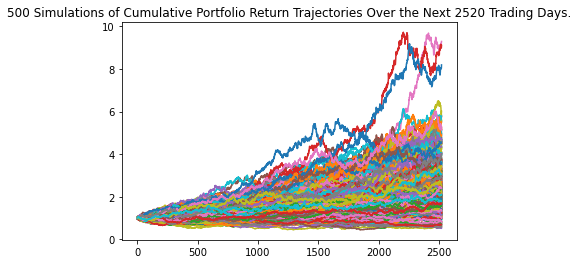

In [34]:
# Plot simulation outcomes
line_plot_ten = MC_25_75_dist_ten.plot_simulation()

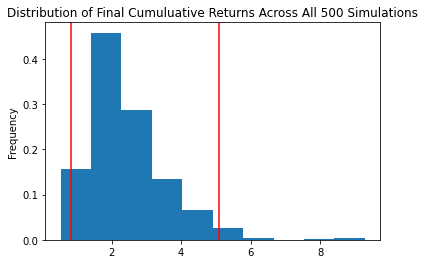

In [35]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_25_75_dist_ten.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_25_75_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.414772
std               1.153834
min               0.523538
25%               1.637191
50%               2.151173
75%               2.948736
max               9.288834
95% CI Lower      0.828387
95% CI Upper      5.085900
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round((tbl_ten[8]*initial_investment), 2)
ci_upper_ten = round((tbl_ten[9]*initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $33135.47 and $203435.99
